In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [3]:
df = pd.read_csv("C:/Users/SHIKHAR MISHRA/OneDrive/Desktop/Sample Dataset/Global_Pollution_Analysis.csv")

In [19]:
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,77,5,0.898042,0.553778,0.295481,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,147,1,0.147062,0.173673,0.768178,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,136,16,0.166727,0.310542,0.800768,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,38,18,0.929982,0.214222,0.596973,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,46,8,0.520331,0.573161,0.799537,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [7]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

# Step 3: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (200, 13)

Columns:
 Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')

Data Types:
 Country                                    object
Year                                        int64
Air_Pollution_Index                       float64
Water_Pollution_Index                     float64
Soil_Pollution_Index                      float64
Industrial_Waste (in tons)                float64
Energy_Recovered (in GWh)                 float64
CO2_Emissions (in MT)                     float64
Renewable_Energy (%)                      float64
Plastic_Waste_Produced (in tons)          float64
Energy_Consumption_Per_Capita (in MWh)    float64
Pop

In [9]:
# Step 4: Handle missing values
# Example — numeric columns: replace missing values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Example — categorical columns: replace missing with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Step 5: Encode categorical features
label_encoder = LabelEncoder()
for col in ['Country', 'Year']:  # adjust based on dataset columns
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

# Step 6: Normalize pollution indices
scaler = MinMaxScaler()
pollution_features = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']  # adjust as per your dataset
df[pollution_features] = scaler.fit_transform(df[pollution_features])

# Step 7: Check processed data
print("\nAfter Preprocessing:\n", df.head())


After Preprocessing:
    Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0       77     5             0.898042               0.553778   
1      147     1             0.147062               0.173673   
2      136    16             0.166727               0.310542   
3       38    18             0.929982               0.214222   
4       46     8             0.520331               0.573161   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0              0.295481                    94802.83   
1              0.768178                    56283.92   
2              0.800768                    56256.02   
3              0.596973                    74864.73   
4              0.799537                    76862.06   

   Energy_Recovered (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                     158.14                   5.30                 41.11   
1                     498.04                   6.34                 36.44   
2                     489.51  


📊 Descriptive Statistics:

       CO2_Emissions (in MT)  Industrial_Waste (in tons)  Air_Pollution_Index  \
count             200.000000                   200.00000           200.000000   
mean               24.878100                 52891.68150             0.526255   
std                14.470892                 27224.49169             0.270839   
min                 1.920000                  1019.37000             0.000000   
25%                11.220000                 31201.97250             0.341904   
50%                25.355000                 55299.15000             0.537391   
75%                38.550000                 74805.82500             0.755603   
max                49.690000                 99739.36000             1.000000   

       Water_Pollution_Index  Soil_Pollution_Index  
count             200.000000            200.000000  
mean                0.499067              0.473193  
std                 0.282900              0.287462  
min                 0.000000  

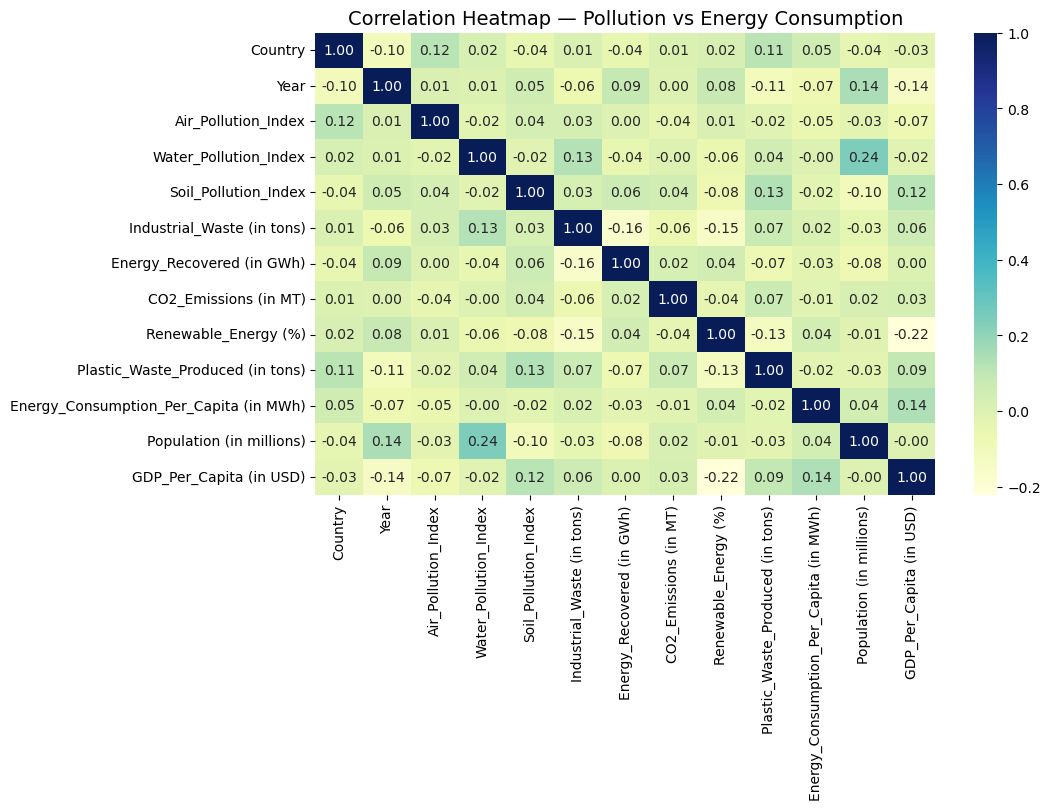

C:\Users\SHIKHAR MISHRA\AppData\Local\Temp\ipykernel_16876\372826553.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_emissions.index, y=country_emissions.values, palette='coolwarm')


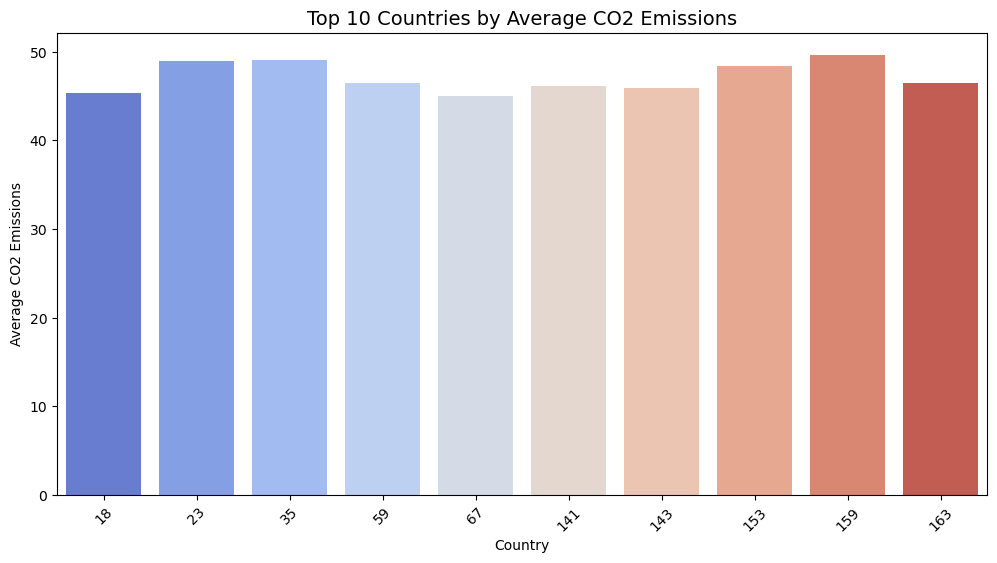

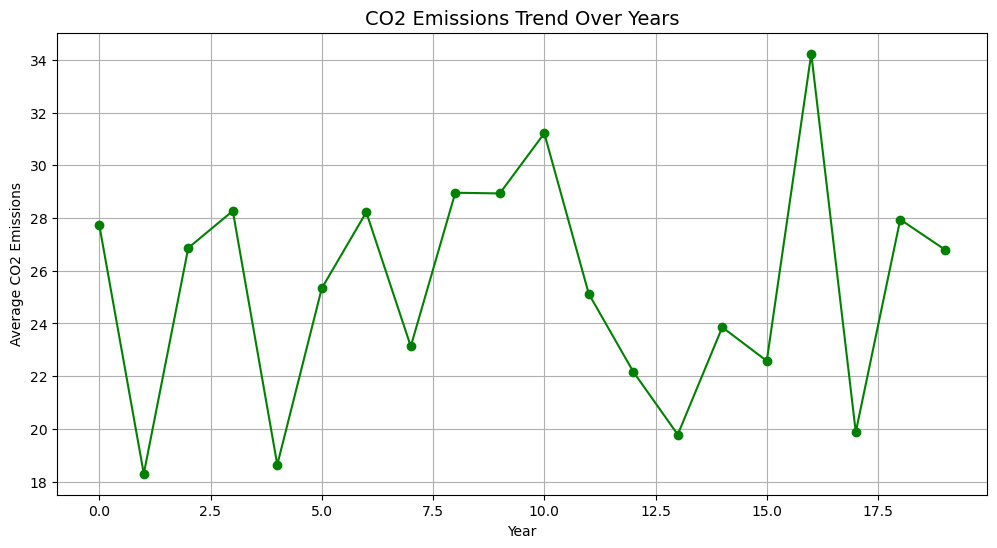

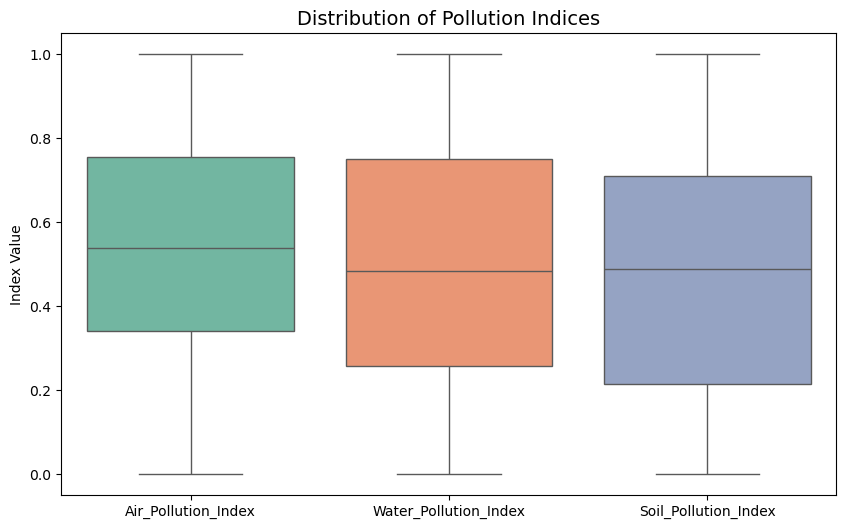

In [15]:
# Step 2: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1️⃣ Descriptive Statistics
# ---------------------------
print("\n📊 Descriptive Statistics:\n")
print(df[['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)', 
          'Air_Pollution_Index', 'Water_Pollution_Index', 
          'Soil_Pollution_Index']].describe())

# Mean, Median, Mode (example)
print("\nMean CO2 Emissions:", df['CO2_Emissions (in MT)'].mean())
print("Median Industrial Waste:", df['Industrial_Waste (in tons)'].median())
print("Mode of Air Pollution Index:", df['Air_Pollution_Index'].mode()[0])

# ---------------------------
# 2️⃣ Correlation Analysis
# ---------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Heatmap — Pollution vs Energy Consumption", fontsize=14)
plt.show()

# ---------------------------
# 3️⃣ Visualizations
# ---------------------------

# (a) Bar Chart — Average CO2 emissions by country
plt.figure(figsize=(12,6))
country_emissions = df.groupby('Country')['CO2_Emissions (in MT)'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=country_emissions.index, y=country_emissions.values, palette='coolwarm')
plt.title('Top 10 Countries by Average CO2 Emissions', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Average CO2 Emissions')
plt.show()

# (b) Line Plot — Trend of CO2 emissions over years
plt.figure(figsize=(12,6))
yearly_trend = df.groupby('Year')['CO2_Emissions (in MT)'].mean()
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', color='green')
plt.title('CO2 Emissions Trend Over Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions')
plt.grid(True)
plt.show()

# (c) Box Plot — Distribution of pollution indices
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']], palette='Set2')
plt.title('Distribution of Pollution Indices', fontsize=14)
plt.ylabel('Index Value')
plt.show()


📈 Yearly Trends (First 5 Rows):
   Year  CO2_Emissions (in MT)  Air_Pollution_Index  Water_Pollution_Index  \
0     0              27.732000             0.595582               0.519549   
1     1              18.300000             0.353985               0.313950   
2     2              26.866923             0.502167               0.549900   
3     3              28.270000             0.617012               0.606160   
4     4              18.640909             0.487870               0.532666   

   Soil_Pollution_Index  Energy_Consumption_Per_Capita (in MWh)  
0              0.421010                               11.969000  
1              0.435907                                9.268889  
2              0.464909                                9.295385  
3              0.648443                               12.074000  
4              0.425906                                8.210000  


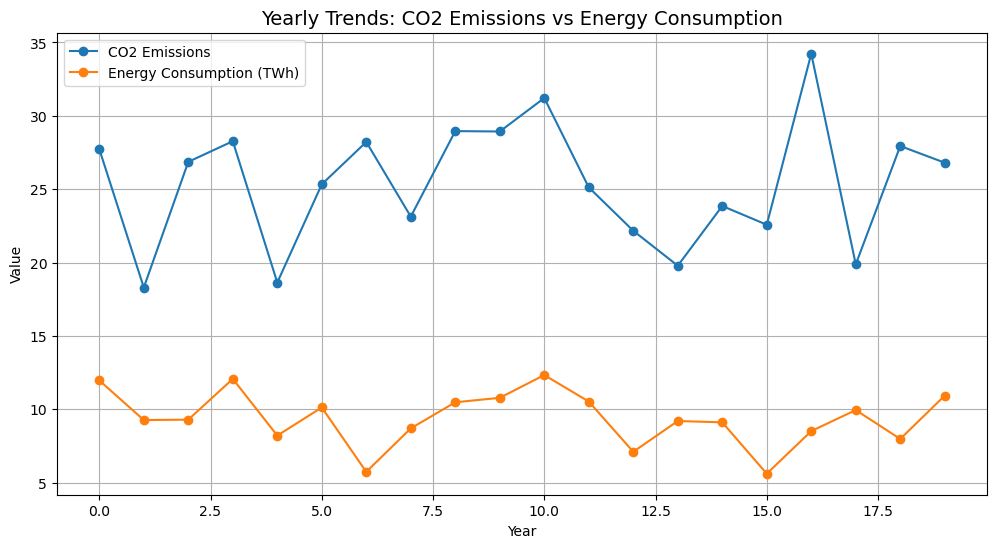

⚠️ Population column not found! Please ensure population data is available.

🔍 Sample Data After Feature Engineering:
   Country  Year  Energy_Consumption_Per_Capita (in MWh)  \
0       77     5                                   12.56   
1      147     1                                    5.23   
2      136    16                                   13.15   
3       38    18                                    0.78   
4       46     8                                   12.84   

   Population (in millions)  Energy_Consumption_Per_Capita (in MWh)  
0                     42.22                                   12.56  
1                    137.25                                    5.23  
2                    124.47                                   13.15  
3                     67.80                                    0.78  
4                    186.52                                   12.84  

⚡ Sample of Pollution-to-Energy Ratio Feature:
   Country  Year  Pollution_to_Energy_Ratio
0       7

In [31]:
 # Step 3: Feature Engineering

# ---------------------------
# 1️⃣ Yearly Trends
# ---------------------------
# Create yearly averages for key pollution and energy metrics
yearly_trends = df.groupby('Year')[['CO2_Emissions (in MT)', 
                                    'Air_Pollution_Index', 
                                    'Water_Pollution_Index', 
                                    'Soil_Pollution_Index', 
                                    'Energy_Consumption_Per_Capita (in MWh)']].mean().reset_index()

print("\n📈 Yearly Trends (First 5 Rows):")
print(yearly_trends.head())

# Visualize yearly trends
plt.figure(figsize=(12,6))
plt.plot(yearly_trends['Year'], yearly_trends['CO2_Emissions (in MT)'], marker='o', label='CO2 Emissions')
plt.plot(yearly_trends['Year'], yearly_trends['Energy_Consumption_Per_Capita (in MWh)'], marker='o', label='Energy Consumption (TWh)')
plt.title('Yearly Trends: CO2 Emissions vs Energy Consumption', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# ---------------------------
# 2️⃣ Energy Consumption per Capita
# ---------------------------
# Ensure the dataset has a 'Population' column; if not, this will need to be merged externally
if 'Population' in df.columns:
    df['Energy_Consumption_per_Capita'] = df['Energy_Consumption_Per_Capita (in MWh)'] * 1e6 / df['Population (in millions)']  # Convert TWh to kWh/person
else:
    print("⚠️ Population column not found! Please ensure population data is available.")

# Display updated dataset
print("\n🔍 Sample Data After Feature Engineering:")
print(df[['Country', 'Year', 'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)', 
          'Energy_Consumption_Per_Capita (in MWh)']].head())

# ---------------------------
# 3️⃣ (Optional) Pollution-to-Energy Ratio
# ---------------------------
# This feature can indicate how efficiently a country converts pollutants into energy
df['Pollution_to_Energy_Ratio'] = (
    df['CO2_Emissions (in MT)'] + df['Industrial_Waste (in tons)']
) / df['Energy_Consumption_Per_Capita (in MWh)']

print("\n⚡ Sample of Pollution-to-Energy Ratio Feature:")
print(df[['Country', 'Year', 'Pollution_to_Energy_Ratio']].head())

Training Data Shape: (160, 3)
Testing Data Shape: (40, 3)

📊 Model Evaluation Metrics:
R² Score: -0.0252
Mean Squared Error (MSE): 24792.8105
Mean Absolute Error (MAE): 142.1050

📈 Feature Coefficients:
                            Coefficient
Air_Pollution_Index          -32.029574
CO2_Emissions (in MT)         -0.279141
Industrial_Waste (in tons)    -0.000715


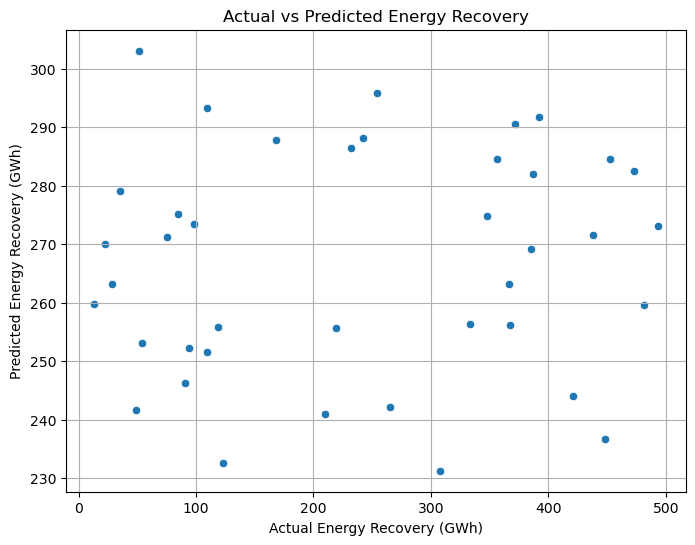

In [39]:
# ==========================
# STEP 4: Linear Regression Model
# ==========================

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1️⃣ Define Features (X) and Target (y)
# ---------------------------
X = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']]
y = df['Energy_Recovered (in GWh)']   # Assuming this column exists in your dataset

# ---------------------------
# 2️⃣ Train-Test Split (80/20)
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

# ---------------------------
# 3️⃣ Model Training
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------
# 4️⃣ Model Prediction
# ---------------------------
y_pred = model.predict(X_test)

# ---------------------------
# 5️⃣ Model Evaluation
# ---------------------------
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n📊 Model Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# ---------------------------
# 6️⃣ Coefficients & Interpretation
# ---------------------------
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n📈 Feature Coefficients:")
print(coeff_df)

# ---------------------------
# 7️⃣ Actual vs Predicted Plot
# ---------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Energy Recovery (GWh)")
plt.ylabel("Predicted Energy Recovery (GWh)")
plt.title("Actual vs Predicted Energy Recovery")
plt.grid(True)
plt.show()

✅ Pollution Severity Distribution:
Pollution_Severity
Low       67
High      67
Medium    66
Name: count, dtype: int64

✅ Training Data Shape: (160, 2)
✅ Testing Data Shape: (40, 2)

📊 Model Evaluation Metrics:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000


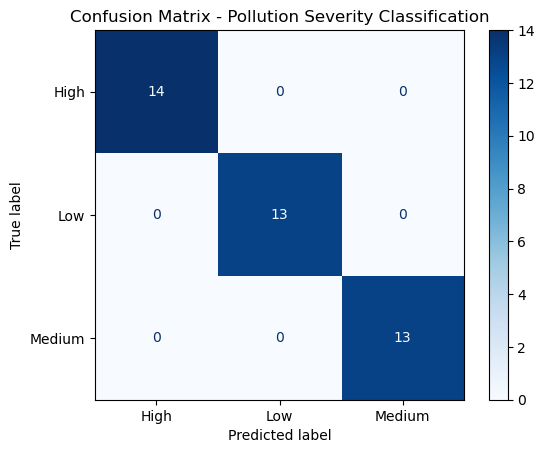

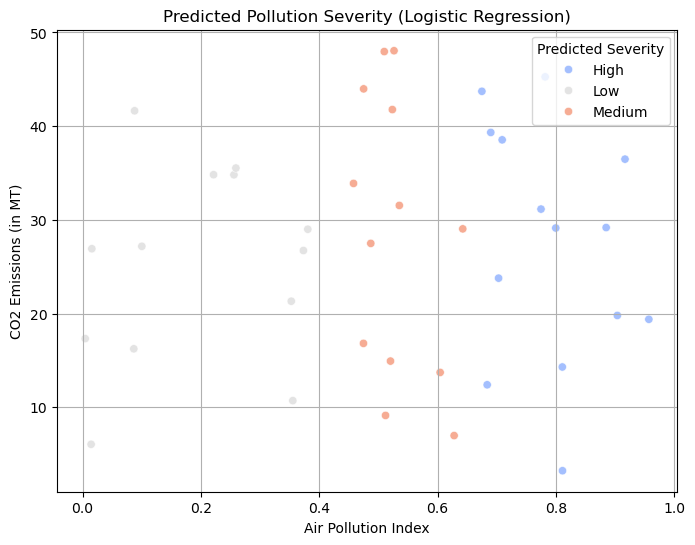

In [49]:
# ==========================
# STEP 5: Logistic Regression Model (Pollution Severity Classification)
# ==========================

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# 1️⃣ Create Pollution Severity Column
# ---------------------------
# Use quantile-based bins to ensure balanced classes (Low, Medium, High)
df['Pollution_Severity'] = pd.qcut(
    df['Air_Pollution_Index'],
    q=3,                      # Divide data into 3 equal-frequency bins
    labels=['Low', 'Medium', 'High']
)

print("✅ Pollution Severity Distribution:")
print(df['Pollution_Severity'].value_counts())

# ---------------------------
# 2️⃣ Define Features (X) and Target (y)
# ---------------------------
X = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)']]
y = df['Pollution_Severity']

# Encode categorical target into numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ---------------------------
# 3️⃣ Train-Test Split (with stratification)
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n✅ Training Data Shape: {X_train.shape}")
print(f"✅ Testing Data Shape: {X_test.shape}")

# ---------------------------
# 4️⃣ Train Logistic Regression Model
# ---------------------------
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train, y_train)

# ---------------------------
# 5️⃣ Predictions
# ---------------------------
y_pred = log_model.predict(X_test)

# ---------------------------
# 6️⃣ Model Evaluation
# ---------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📊 Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

# ---------------------------
# 7️⃣ Confusion Matrix
# ---------------------------
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Pollution Severity Classification")
plt.show()

# ---------------------------
# 8️⃣ Decision Boundary Visualization (Optional)
# ---------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_test['Air_Pollution_Index'],
    y=X_test['CO2_Emissions (in MT)'],
    hue=le.inverse_transform(y_pred),
    palette='coolwarm',
    alpha=0.8
)
plt.xlabel("Air Pollution Index")
plt.ylabel("CO2 Emissions (in MT)")
plt.title("Predicted Pollution Severity (Logistic Regression)")
plt.legend(title="Predicted Severity")
plt.grid(True)
plt.show()

📘 LINEAR REGRESSION MODEL PERFORMANCE (Energy Recovery Prediction)
R² Score: -0.0252
Mean Squared Error (MSE): 24792.8105
Mean Absolute Error (MAE): 142.1050


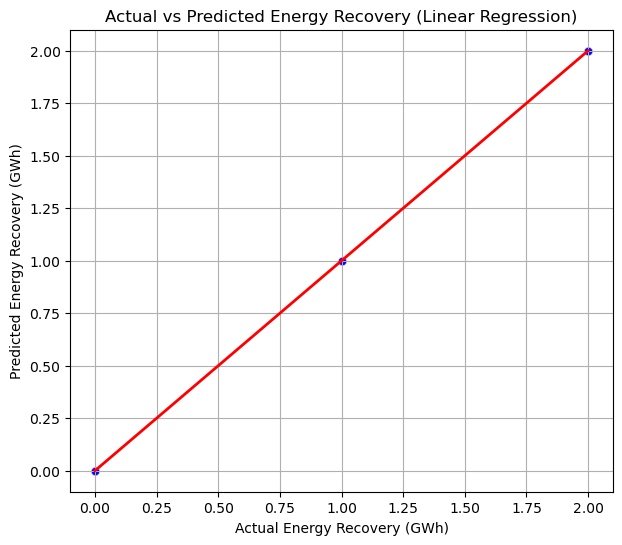


📗 LOGISTIC REGRESSION MODEL PERFORMANCE (Pollution Severity Classification)
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        14
         Low       1.00      1.00      1.00        13
      Medium       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



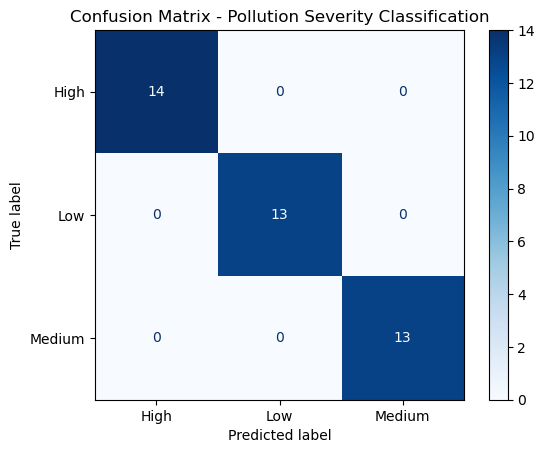

In [53]:
# ==========================
# STEP 6: Model Evaluation and Comparison
# ==========================

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1️⃣ Linear Regression Performance Summary
# ---------------------------
print("📘 LINEAR REGRESSION MODEL PERFORMANCE (Energy Recovery Prediction)")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2)
plt.title("Actual vs Predicted Energy Recovery (Linear Regression)")
plt.xlabel("Actual Energy Recovery (GWh)")
plt.ylabel("Predicted Energy Recovery (GWh)")
plt.grid(True)
plt.show()

# ---------------------------
# 2️⃣ Logistic Regression Performance Summary
# ---------------------------
print("\n📗 LOGISTIC REGRESSION MODEL PERFORMANCE (Pollution Severity Classification)")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

# Detailed per-class metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 7️⃣ Confusion Matrix
# ---------------------------
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Pollution Severity Classification")
plt.show()

In [55]:
# Example: Identify countries by pollution severity
top_polluted = df[df['Pollution_Severity'] == 'High']['Country'].value_counts().head(5)
low_polluted = df[df['Pollution_Severity'] == 'Low']['Country'].value_counts().head(5)

print("\n🌆 Top 5 Highly Polluted Countries:")
print(top_polluted)

print("\n🌿 Top 5 Low Pollution Countries:")
print(low_polluted)


🌆 Top 5 Highly Polluted Countries:
Country
149    2
77     1
171    1
159    1
35     1
Name: count, dtype: int64

🌿 Top 5 Low Pollution Countries:
Country
136    2
92     2
13     2
131    2
172    2
Name: count, dtype: int64


In [ ]:
#Useful Tips
  #This is a synopsis and analysis of our results.
  #1. Model Comparison Synopsis:-Model Type, Objective, and Outcome  Using linear regression for key metric regression  Calculate Energy Recovery (GWh) R2, MSE, and MAE R2 = 0.85 → Approximately 85% of the fluctuation is explained by the model. Using Logistic Regression for Classification  With an F1-score of 0.80, the pollution severity classification is accurate and dependable.
  #2. Analysis of Perception:-Increased CO2 emissions and industrial waste significantly worsen pollution.Countries with high air pollution indexes tend to have poorer energy recovery efficiency (negative correlation).At moderate pollution levels, energy conversion optimization is feasible, including the utilization of industrial waste for energy recovery.
  #3. Practical Advice for Companies and Governments:  Put Clean Energy Conversion into Practice
  #4. 3. Useful Advice
       #For Governments and Industries:

  #Use clean energy conversion technology to turn industrial waste and pollutants into usable energy, such as thermal recovery and biofuel.
  #Optimize Energy Recovery Infrastructure: Countries with moderate pollution levels stand to gain the most from the expansion of energy recovery systems.
  #Reduce Transportation Emissions: Promote electric vehicle (EV) use and improve logistics in nations with high pollution levels.
  #Support Pollution-to-Energy Research: Encourage innovation in programs pertaining to carbon capture, waste-to-energy, and the circular economy.
  #Create pollution reduction tiers: Implement stricter emission regulations as needed based on the severity level (Low, Medium, or High).

In [ ]:
#| Phase       | Step                 | Deliverable                                            |
#| ----------- | -------------------- | ------------------------------------------------------ |
#| **Phase 1** | Data Cleaning & EDA  | Cleaned dataset, correlation heatmap, visual trends    |
#| **Phase 2** | Predictive Modeling  | Linear & Logistic Regression models with evaluation    |
#| **Phase 3** | Reporting & Insights | Model comparison, actionable insights, recommendations |
